<a href="https://colab.research.google.com/github/DATAUNIRIO/Ferramentas_do_Python/blob/main/aula_estatistica_basica_no_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
 
QE = pd.read_csv("https://raw.githubusercontent.com/DATAUNIRIO/Base_de_dados/master/QE.csv") 



In [2]:
# listar os objetos
%whos

Variable   Type         Data/Info
---------------------------------
QE         DataFrame        Aluno  T Mora_pais   <...>n\n[95 rows x 10 columns]
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [3]:
# as 3 primeiras linhas do banco de dados
print(QE.head(3))

   Aluno  T Mora_pais   RJ Namorado_a Trabalha  Desempenho  Estresse  \
0      1  1       Nao  Nao        Nao      Nao        8.89        23   
1      2  1       Sim  Sim        Nao      Nao        8.80        24   
2      3  1       Nao  Nao        Nao      Nao        8.00        25   

   Creditos  Horas_estudo  
0      27.0            27  
1      28.0            28  
2      25.0            25  


In [4]:
QE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Aluno         95 non-null     int64  
 1   T             95 non-null     int64  
 2   Mora_pais     95 non-null     object 
 3   RJ            95 non-null     object 
 4   Namorado_a    95 non-null     object 
 5   Trabalha      95 non-null     object 
 6   Desempenho    95 non-null     float64
 7   Estresse      95 non-null     int64  
 8   Creditos      94 non-null     float64
 9   Horas_estudo  95 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ KB


## VARIÁVEL QUALITATIVA
Vamos fazer:
1. tabela em números absolutos
2. proporções
3. gráfico de pizza
4. gráfico de barras

In [6]:
#fazendo tabelas
tabela_simples = QE.Trabalha.value_counts()
tabela_simples

Nao    59
Sim    36
Name: Trabalha, dtype: int64

In [7]:
#fazendo proporções
#tabela_simples/tabela_simples.sum()*100

round(tabela_simples/tabela_simples.sum()*100,2)

Nao    62.11
Sim    37.89
Name: Trabalha, dtype: float64

<Axes: ylabel='Trabalha'>

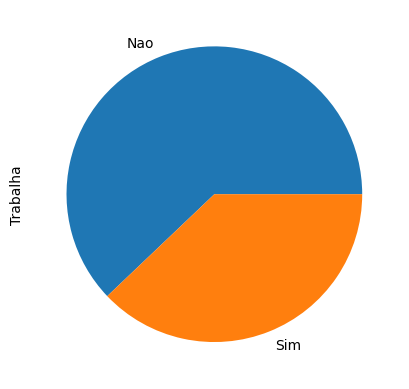

In [8]:
# grafico de pizza
tabela_simples.plot.pie()


<Axes: >

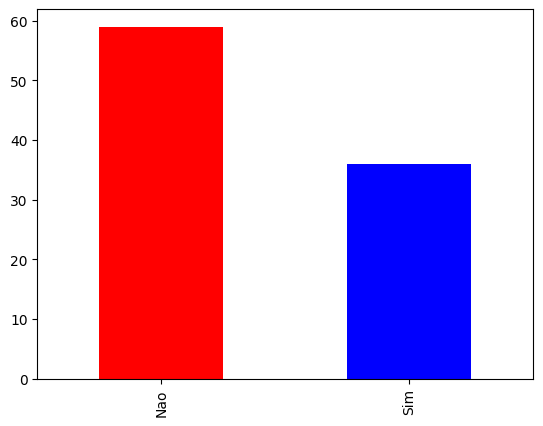

In [9]:
# grafico de barras
#tabela_simples.plot.bar()
#tabela_simples.plot.bar(color="red")
tabela_simples.plot.bar(color=["red","blue"])

# VARIÁVEL QUANTITATIVA
Vamos fazer: 
*   Resumos
*   Histograma



In [10]:
# O ponto (".") pode ser o $ ou ::
# aqui vou usar como $ para selecionar variáveis
QE.Horas_estudo.describe()

count    95.000000
mean     30.726316
std       7.276371
min      19.000000
25%      25.000000
50%      30.000000
75%      35.000000
max      60.000000
Name: Horas_estudo, dtype: float64

In [11]:
QE.Desempenho.describe()

count    95.000000
mean      8.593789
std       0.775319
min       5.820000
25%       8.500000
50%       8.700000
75%       9.050000
max       9.700000
Name: Desempenho, dtype: float64

<Axes: ylabel='Frequency'>

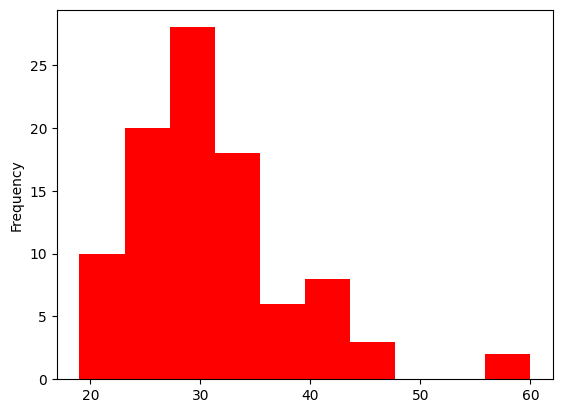

In [12]:
# histograma
#QE.Horas_estudo.plot.hist()
QE.Horas_estudo.plot.hist(color="red")


# DUAS VARIÁVEIS QUALITATIVAS
Vamos fazer: 
*   Tabela para duas variáveis (crosstab)
*   barplot para duas variáveis

In [13]:
#tabela = pd.crosstab(QE.Trabalha, QE.Mora_pais)

tabela = pd.crosstab(QE.Trabalha, QE.Mora_pais, rownames=['Trabalha'], colnames=['Mora com os pais'])
tabela

Mora com os pais,Nao,Sim
Trabalha,,
Nao,32,27
Sim,19,17


In [14]:
# soma da coluna (100 na coluna)
round(tabela/tabela.sum()*100,2)

Mora com os pais,Nao,Sim
Trabalha,,
Nao,62.75,61.36
Sim,37.25,38.64


In [16]:
# abordagem melhor: use o normalise
# normalise por total (all), linhas (index), ou colunas (columns).
tabela_linha = pd.crosstab(QE.Trabalha, QE.Mora_pais, rownames=['Trabalha'], colnames=['Mora com os pais'], normalize='index')*100
tabela_linha

Mora com os pais,Nao,Sim
Trabalha,,
Nao,54.237288,45.762712
Sim,52.777778,47.222222


In [17]:
# normalise por colunas (columns).
tabela_coluna = pd.crosstab(QE.Trabalha, QE.Mora_pais, rownames=['Trabalha'], colnames=['Mora com os pais'], normalize='columns')
round(tabela_coluna*100,2)

Mora com os pais,Nao,Sim
Trabalha,,
Nao,62.75,61.36
Sim,37.25,38.64


<Axes: xlabel='Trabalha'>

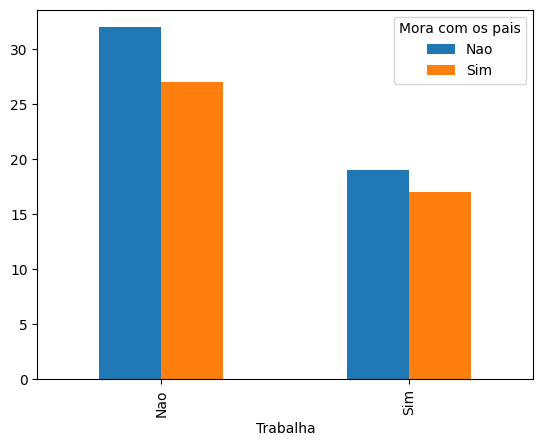

In [18]:
tabela.plot.bar()

# Uma variável qualitativa e uma variável quantitativa
Vamos fazer:
1. Resumo por grupos
2. Boxplot


In [21]:

QE.groupby("Trabalha").agg(horas_media =("Horas_estudo", "mean"),horas_mediano = ("Horas_estudo", "median")) 


,horas_media,horas_mediano
Trabalha,,
Nao,31.559322,30.0
Sim,29.361111,30.0


In [23]:
QE.groupby("Trabalha").agg(minimo=("Horas_estudo","min"), horas_media =("Horas_estudo", "mean"),maximo = ("Horas_estudo", "max")) 


,minimo,horas_media,maximo
Trabalha,,,
Nao,20,31.559322,60
Sim,19,29.361111,59


In [26]:

QE.groupby("Trabalha").agg(horas_media =("Horas_estudo", "mean"),desvio_padrao = ("Horas_estudo", "std")) 



,horas_media,desvio_padrao
Trabalha,,
Nao,31.559322,6.928878
Sim,29.361111,7.716967


<Axes: title={'center': 'Horas_estudo'}, xlabel='Trabalha'>

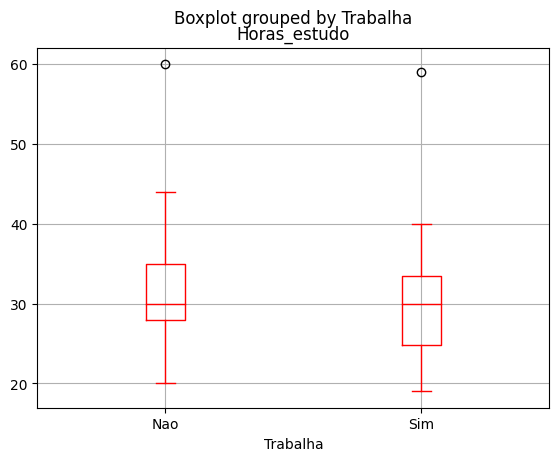

In [28]:
QE.boxplot("Horas_estudo",by='Trabalha',color="red")

# DUAS VARIÁVEIS QUANTITATIVAS
1. Diagrama de dispersão
2. Coeficiente de correlação

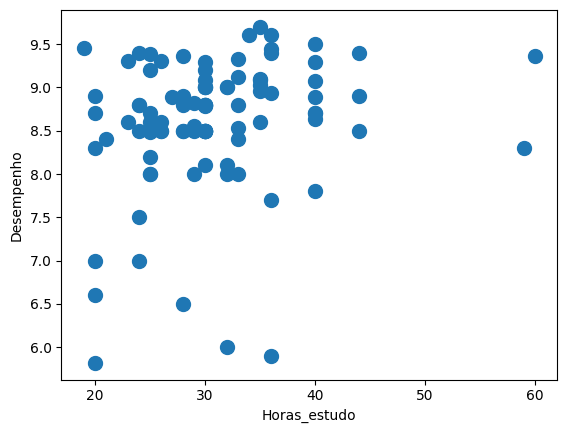

In [29]:
# Draw a scatter plot
QE.plot.scatter(x = 'Horas_estudo', y = 'Desempenho', s = 100);

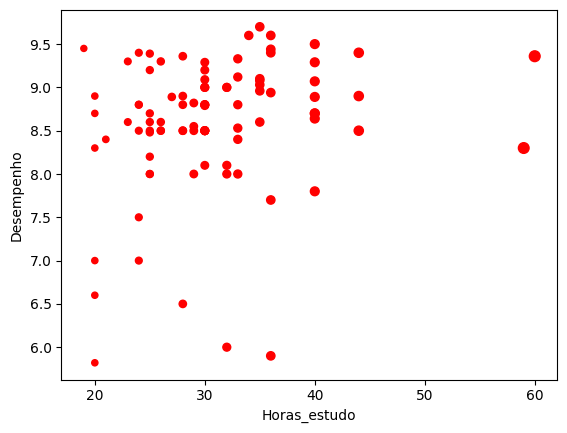

In [30]:
# Draw a scatter plot and here size of dots determined by price
QE.plot.scatter(x = 'Horas_estudo', y = 'Desempenho', s = 'Horas_estudo', c = 'red');


In [ ]:
# The Pandas Plot Function
#df.plot(
#    x=None,         # Values to use for x axis
#    y=None,         # Values to use for y axis
#    kind='line',    # The type of chart to make
#    title=None,     # The title to use
#    legend=False,   # Whether to show a legend
#    xlabel=None,    # What the x-axis label should be
#    ylabel=None     # What the y-axis label should be
#    c=None,         # The color to use for the dots
#    s=None          # How to size dots (single number or column)
#)

<Axes: title={'center': 'meu gráfico'}, xlabel='Horas de estudo', ylabel='nota na prova'>

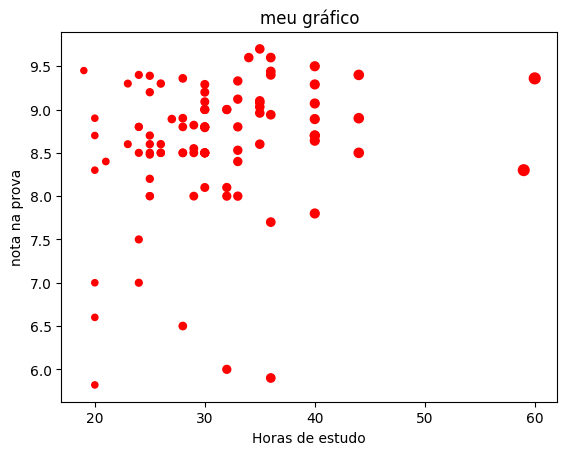

In [33]:
QE.plot.scatter(x = 'Horas_estudo', y = 'Desempenho', s = 'Horas_estudo', c = 'red',title="meu gráfico",xlabel="Horas de estudo",ylabel="nota na prova")


In [34]:
# filter de colunas no python e linhas no R
QE.filter(["Horas_estudo", "Desempenho"]).corr()

,Horas_estudo,Desempenho
Horas_estudo,1.000000,0.223153
Desempenho,0.223153,1.000000


In [35]:
 QE.filter(["Horas_estudo", "Desempenho","Estresse","Creditos"]).corr() 

,Horas_estudo,Desempenho,Estresse,Creditos
Horas_estudo,1.000000,0.223153,0.303917,0.498440
Desempenho,0.223153,1.000000,0.082572,0.086315
Estresse,0.303917,0.082572,1.000000,-0.058980
Creditos,0.498440,0.086315,-0.058980,1.000000


In [37]:
 QE.filter(["Horas_estudo", "Desempenho","Estresse","Creditos"]).corr(method='spearman') 

,Horas_estudo,Desempenho,Estresse,Creditos
Horas_estudo,1.000000,0.266913,0.348691,0.368627
Desempenho,0.266913,1.000000,0.028602,0.098367
Estresse,0.348691,0.028602,1.000000,-0.104958
Creditos,0.368627,0.098367,-0.104958,1.000000


<Axes: >

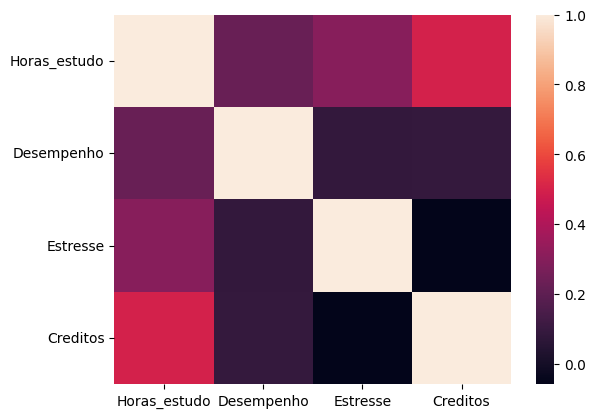

In [38]:
# plot the heatmap
import seaborn as sns
%matplotlib inline

correlacao =  QE.filter(["Horas_estudo", "Desempenho","Estresse","Creditos"]).corr() 
sns.heatmap(correlacao)

<Axes: >

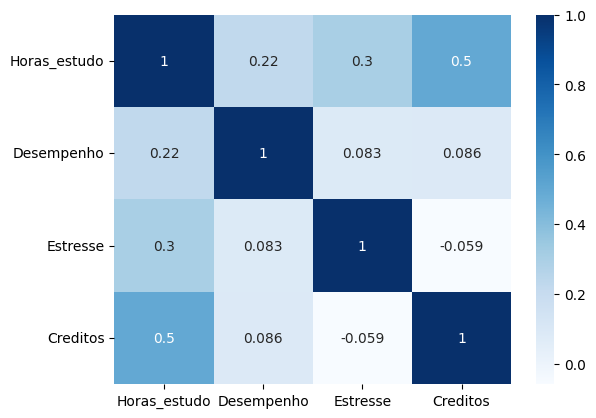

In [39]:
sns.heatmap(correlacao, cmap="Blues", annot=True)

In [40]:
# posso fazer:
(QE.assign(
     tem_na = QE.Horas_estudo.isna(),
     tem_sim = QE.Trabalha.str.contains("Sim")
     # esse é um jeito de você acessar métodos mais "básicos" de um objeto
     ))


,Aluno,T,Mora_pais,RJ,Namorado_a,Trabalha,Desempenho,Estresse,Creditos,Horas_estudo,tem_na,tem_sim
0,1,1,Nao,Nao,Nao,Nao,8.89,23,27.0,27,False,False
1,2,1,Sim,Sim,Nao,Nao,8.80,24,28.0,28,False,False
2,3,1,Nao,Nao,Nao,Nao,8.00,25,25.0,25,False,False
3,4,1,Nao,Nao,Sim,Sim,8.80,38,21.0,30,False,True
4,5,1,Nao,Nao,Nao,Sim,8.90,41,18.0,20,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,3,Nao,Nao,Sim,Sim,8.60,22,23.0,25,False,True
91,92,3,Sim,Sim,Nao,Nao,9.30,12,27.0,26,False,False
92,93,3,Nao,Nao,Sim,Sim,9.40,16,27.0,24,False,True
93,94,3,Sim,Nao,Sim,Nao,9.44,27,24.0,36,False,False


In [42]:
# (1) selecionar linha com o query
# (2) selecionar coluna com o filter
# (3) criar colunas com o assign

QE.query("Trabalha=='Sim'").Namorado_a


3     Sim
4     Nao
5     Sim
7     Sim
8     Nao
9     Nao
10    Sim
11    Sim
12    Nao
14    Nao
15    Nao
16    Nao
19    Nao
23    Nao
24    Nao
30    Sim
36    Nao
38    Nao
41    Sim
49    Sim
57    Nao
60    Sim
64    Nao
65    Sim
73    Sim
74    Nao
75    Sim
78    Sim
82    Nao
84    Sim
85    Sim
86    Nao
87    Nao
89    Sim
90    Sim
92    Sim
Name: Namorado_a, dtype: object

In [48]:
#QE.query("T==1").Namorado_a
#QE.query("T!=1").Namorado_a
#QE.query("T==2|T==3").Namorado_a

#carro.query("Type in ('Small','Midsize')")
# igual no R seria assi, QE %>% filter(T %in% c(2,3))
QE.query("T in (2,3)").Namorado_a



28    Sim
29    Sim
30    Sim
31    Nao
32    Sim
     ... 
90    Sim
91    Nao
92    Sim
93    Sim
94    Sim
Name: Namorado_a, Length: 67, dtype: object

In [49]:
QE.columns

Index(['Aluno', 'T', 'Mora_pais', 'RJ', 'Namorado_a', 'Trabalha', 'Desempenho',
       'Estresse', 'Creditos', 'Horas_estudo'],
      dtype='object')

In [50]:
len(QE)

95